# **Project Name**    - Paisabazaar Banking Fraud Analysis - Exploratory Data Analysis



##### **Project Type**    - EDA

# **Project Summary -**



Paisabazaar is a financial services company that assists customers in finding and applying for various banking and credit products. An integral part of their service is assessing the creditworthiness of individuals, which is crucial for both loan approval and risk management. The credit score of a person is a significant metric used by financial institutions to determine the likelihood that an individual will repay their loans or credit balances. Accurate classification of credit scores can help Paisabazaar enhance their credit assessment processes, reduce the risk of loan defaults, and offer personalized financial advice to their customers.
In this context, analyzing and classifying credit scores based on customer data can improve decision- making processes and contribute to better financial product recommendations. This case study aims to develop a model that predicts the credit score of individuals based on various features, such as income, credit card usage, and payment behavior.

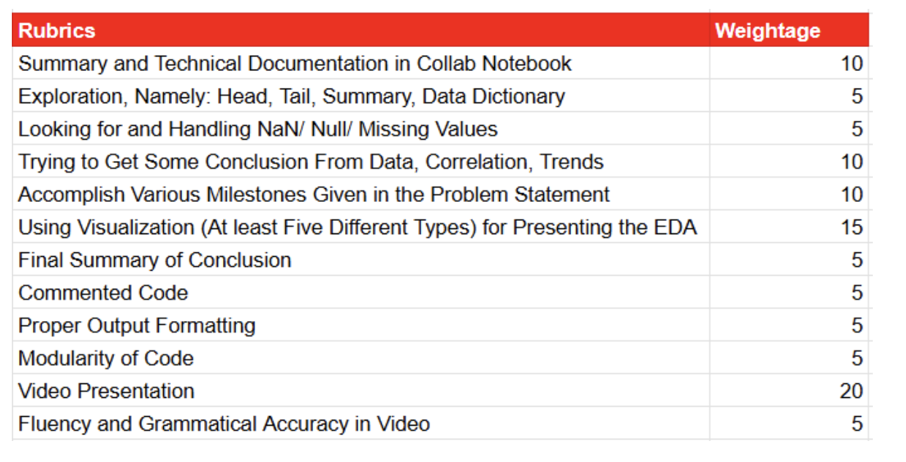

## ***1. Know Your Data***

### Import Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Dataset Loading

In [ ]:
df = pd.read_csv(r"dataset-2-week1.csv")

### Dataset First View

In [5]:
df.head()
# this shows first 5 rows 

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### Understanding the Features

Credit_Utilization_Ratio: a percentage of used credit over total credit limit 

    - For example: if your total credit card balance is $2,000 and your total credit limit is $10,000, your utilization ratio is 20%.
    
Credit_History_Age: The length of time (often in years and months) that the borrower has had an active credit history. A longer credit history usually indicates more reliability and helps creditworthiness.

Payment_of_Min_Amount: Whether the borrower pays only the minimum required amount on credit cards/loans (Yes/No or categorical). Paying only the minimum suggests higher credit risk compared to paying the full balance.

Total_EMI_per_month: The total Equated Monthly Installments (EMIs) the borrower pays across all loans (e.g., mortgage, car loan, personal loan). It reflects fixed monthly debt obligations and impacts disposable income.


### Dataset Rows & Columns count

In [6]:
df.shape

(100000, 28)

The first number shouws the number of rows and the second column shows the number of columns 

### Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

#### Duplicate Values

In [11]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

#### Missing Values/Null Values

In [9]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

## ***2. Understanding Your Variables***

In [11]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [12]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Variables Description

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

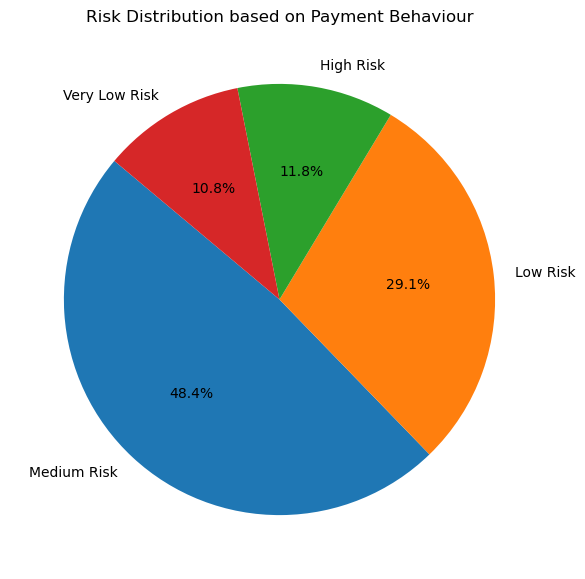

In [15]:
# Count occurrences of each payment behaviour
payment_counts = df['Payment_Behaviour'].value_counts()

# Define mapping from Payment_Behaviour to risk categories
risk_mapping = {
    'High_spent_Small_value_payments': 'High Risk',
    'High_spent_Medium_value_payments': 'Medium Risk',
    'High_spent_Large_value_payments': 'Low Risk',
    'Low_spent_Small_value_payments': 'Medium Risk',
    'Low_spent_Medium_value_payments': 'Low Risk',
    'Low_spent_Large_value_payments': 'Very Low Risk'
}

# Apply mapping
df['Risk_Category'] = df['Payment_Behaviour'].map(risk_mapping)

# Count values in each risk category
risk_counts = df['Risk_Category'].value_counts()

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Risk Distribution based on Payment Behaviour")
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows the proportion of each category of risk in regards to the whole. We can see most payment behaviours are Medium Risk  - almost half. A very small proportion of behaviours are high risk at 11.8%. 

##### 2. What is/are the insight(s) found from the chart?

We can see most payment behaviours are Medium Risk  - almost half. A very small proportion of behaviours are high risk at 11.8%. 

##### 3. Will the gained insights help creating a positive business impact?
We can later identify which transactions are high risk and refuse customers who tend to be high risk with payment behaviours leading to less loss for a business. 

#### Chart - 2 Credit Utilization vs. Credit Score

C:\Users\Admin\AppData\Local\Temp\ipykernel_18748\610467114.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, palette="Set2")


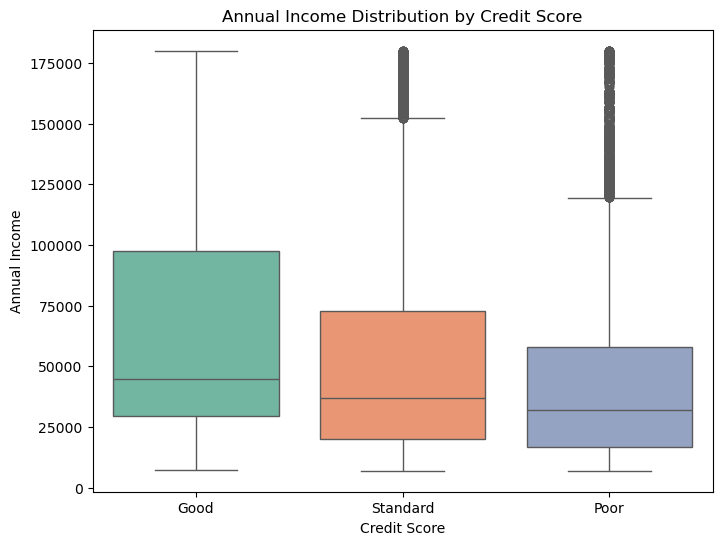

In [17]:
# Chart - 2 visualization code


plt.figure(figsize=(8,6))
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, palette="Set2")

plt.title("Annual Income Distribution by Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Annual Income")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a boxplot as this way you can compare income distribution across credit score categories. 

##### 2. What is/are the insight(s) found from the chart?

Customers with a good credit score tend to have higher annual income shows by the median. Despite this there isn't a huge discrepency between customers with lower salaries and higher salaries when it comes to credit scores. 

##### 3. Will the gained insights help creating a positive business impact?

Perhaps the business could target customers with higher incomes as they tend to have better credit scores.

Answer Here

#### Chart - 3

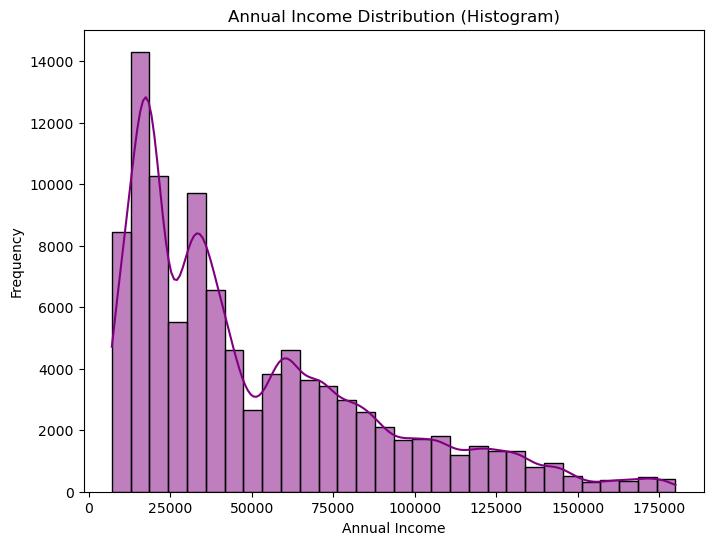

In [19]:
# Chart - 3 visualization code

plt.figure(figsize=(8,6))
sns.histplot(df['Annual_Income'], bins=30, kde=True, color="purple")

plt.title("Annual Income Distribution (Histogram)")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()


##### 1. Why did you pick the specific chart?

I wanted to visualise the distribution of annual incomes in the data. 

##### 2. What is/are the insight(s) found from the chart?

Most of the entries are people with a lower annual income, this suggests a large proportion of customers aren't very wealthy so it's important to not completely disregard them as a customer base despite the customers with higher salaries having better credit scores overall. 

##### 3. Will the gained insights help creating a positive business impact?
Yes, it shows to not completely discount customers with lower salaries as a customer base as this would be a huge loss for the company 

Answer Here

#### Chart - 4

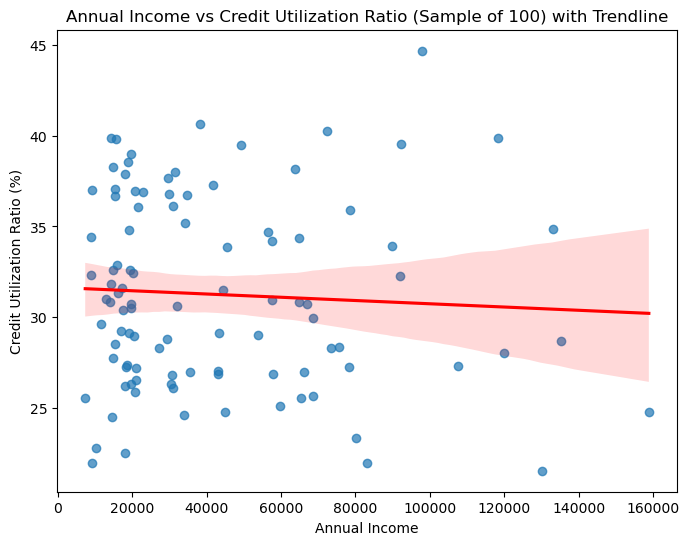

In [27]:
# Chart - 4 visualization code


# Randomly sample 100 rows
df_sample = df.sample(n=100, random_state=42)

plt.figure(figsize=(8,6))
sns.regplot(x='Annual_Income', y='Credit_Utilization_Ratio', data=df_sample,
            scatter_kws={'alpha':0.7}, line_kws={'color':'red'})

plt.title("Annual Income vs Credit Utilization Ratio (Sample of 100) with Trendline")
plt.xlabel("Annual Income")
plt.ylabel("Credit Utilization Ratio (%)")
plt.show()


##### 1. Why did you pick the specific chart?

To visualise a relationship between annual income and credit utilizaiton ratio and see it there is perhaps a positive or negative correlation

##### 2. What is/are the insight(s) found from the chart?

There is no obvious trend or correlation here suggesting that there isn't a relationship between annual income and Credit utilization ratio

##### 3. Will the gained insights help creating a positive business impact?
yes it shows that there is no obvious correlation hence no strategy needs to taken with higher or lower income customers. 

Answer Here

#### Chart - 5

C:\Users\Admin\AppData\Local\Temp\ipykernel_18748\3868073505.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Occupation', data=df, order=df['Occupation'].value_counts().index, palette="Set3")


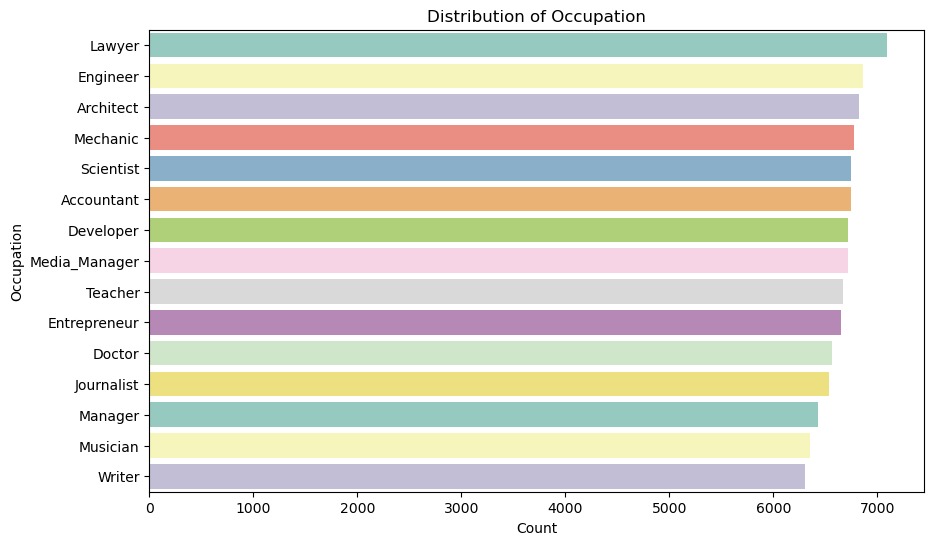

In [28]:
# Chart - 5 visualization code

# Count of each occupation
plt.figure(figsize=(10,6))
sns.countplot(y='Occupation', data=df, order=df['Occupation'].value_counts().index, palette="Set3")

plt.title("Distribution of Occupation")
plt.xlabel("Count")
plt.ylabel("Occupation")
plt.show()


##### 1. Why did you pick the specific chart?

This is a bar chart to visualise the count of each category in occupations to see what roles the customers have. 

##### 2. What is/are the insight(s) found from the chart?

Most customers have professional roles and aren't unemployed. Lawyers are the most prevalent occupation however there isn't a huge difference between this job and other jobs. 

##### 3. Will the gained insights help creating a positive business impact?
There is no obvious apparent business impact this would have, however it helps understand the customer base/ 

# **Conclusion**

Some key insights are that a large proportion of the customer base is made up of people with incomes lower than 50,000 and that customers with a good credit score tend to have higher annual income. Another insight is that almost half of payment behaviours are Medium Risk. This shows how the company needs to manage how it approves loans : cutting out customers with lower income would drastically reduce the customer base however not having enough high earning customers may affect profit / stability of the company. 